In [1]:
#TASK 1:Motion Estimation and Event Detection in a Video
import cv2
import numpy as np
import os

# Function to calculate the absolute difference between frames
def highlight_motion(prev_frame, current_frame, threshold=25):
    # Convert to grayscale
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    current_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
    
    # Compute the absolute difference between the current frame and the previous frame
    frame_diff = cv2.absdiff(prev_gray, current_gray)
    
    # Threshold the difference to obtain regions of motion
    _, motion_mask = cv2.threshold(frame_diff, threshold, 255, cv2.THRESH_BINARY)
    
    # Dilate the mask to fill in gaps
    motion_mask = cv2.dilate(motion_mask, None, iterations=2)
    
    # Create an image where motion regions are highlighted in red
    motion_highlighted = current_frame.copy()
    motion_highlighted[motion_mask > 0] = [0, 0, 255]  # Red color for moving regions
    
    return motion_highlighted, motion_mask

# Function to detect motion and save frames with events
def detect_and_save_motion(video_path, output_folder, threshold=25, hist_threshold=0.95):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)  # Create output folder if it doesn't exist
    
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Error: Cannot open video file.")
        return
    
    frame_rate = cap.get(cv2.CAP_PROP_FPS)  # Get the frame rate of the video
    ret, prev_frame = cap.read()
    frame_count = 0
    event_frames = []
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Highlight motion in the current frame
        highlighted_frame, motion_mask = highlight_motion(prev_frame, frame, threshold)
        
        # Calculate the percentage of the frame where motion is detected
        motion_percentage = np.sum(motion_mask > 0) / motion_mask.size
        
        # Detect significant motion events if motion exceeds a certain percentage
        if motion_percentage > 0.02:  # e.g., 2% of the frame is in motion
            timestamp = frame_count / frame_rate  # Calculate timestamp in seconds
            cv2.putText(highlighted_frame, f"Motion Detected at {timestamp:.2f} sec", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            event_frames.append(frame_count)
            
            # Save frame to output folder with annotation
            output_filename = os.path.join(output_folder, f"frame_{frame_count}.jpg")
            cv2.imwrite(output_filename, highlighted_frame)
        
        # Display the highlighted frame
        cv2.imshow('Motion Detection', highlighted_frame)
        
        # Set the current frame as previous for the next iteration
        prev_frame = frame.copy()
        frame_count += 1
        
        # Break the loop if 'q' is pressed
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()
    
    # Print detected events
    if event_frames:
        print(f"Motion events detected at frames: {event_frames}")
    else:
        print("No significant motion events detected.")

# Main execution
video_path = '/Users/madha/OneDrive/Desktop/fall sem 2024/image and video analytics/lab/lab 5/sample video.mp4'
output_folder = '/Users/madha/OneDrive/Desktop/fall sem 2024/image and video analytics/lab/lab 5/frames folders'

detect_and_save_motion(video_path, output_folder)


Motion events detected at frames: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

Total images loaded: 13


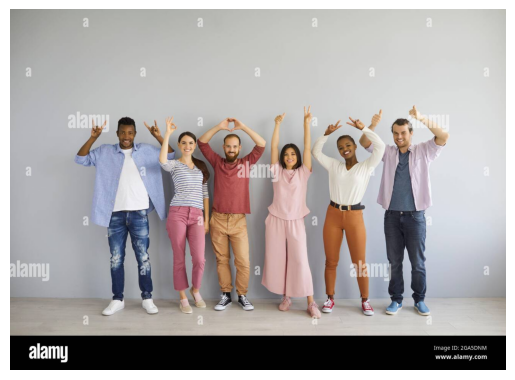

In [68]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Image Set
def load_images(folder_path):
    images = []
    for i in range(1, 14): 
        img = cv2.imread(f"{folder_path}/{i}.jpg")
        if img is not None:
            images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
        else:
            print(f"Image {folder_path}/image_{i}.jpg not found or could not be loaded.")
    print(f"Total images loaded: {len(images)}")
    return images

# Load images (replace with your actual image path)
folder_path = '/Users/madha/OneDrive/Desktop/fall sem 2024/image and video analytics/lab/lab 5/facial expressions/people'
images = load_images(folder_path)

# Check if images list is not empty, then display a sample image
if images:
    plt.imshow(images[5])  # Use index 0 to avoid an out-of-range error
    plt.axis('off')
    plt.show()
else:
    print("No images were loaded. Please check the folder path or the image files.")




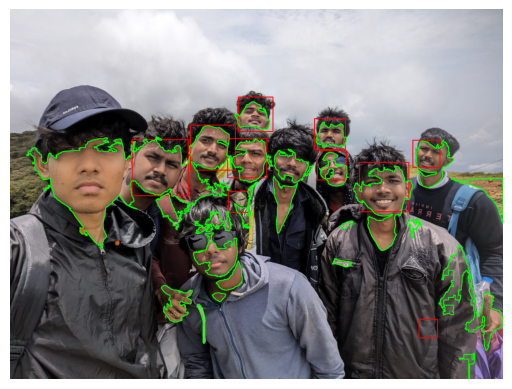

In [74]:
# Step 2: Preprocessing (Detect Faces and Hand Gestures)
def detect_faces(image):
    # Convert to grayscale for face detection
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Use Haar cascades for face detection (pre-trained model)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    return faces

def detect_hands(image):
    # Convert to HSV color space for better skin color detection
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)
    mask = cv2.inRange(hsv, lower_skin, upper_skin)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    hand_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 500]  # Filter small contours
    return hand_contours

# Detect faces and hands in the sample image
faces = detect_faces(images[12])
hands = detect_hands(images[12])

# Display faces and hand regions
img_copy = images[12].copy()
for (x, y, w, h) in faces:
    cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255, 0, 0), 2)
for hand in hands:
    cv2.drawContours(img_copy, [hand], -1, (0, 255, 0), 2)
plt.imshow(img_copy)
plt.axis('off')
plt.show()

Individual Emotions: ['happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy']
Overall Sentiment of Crowd: happy


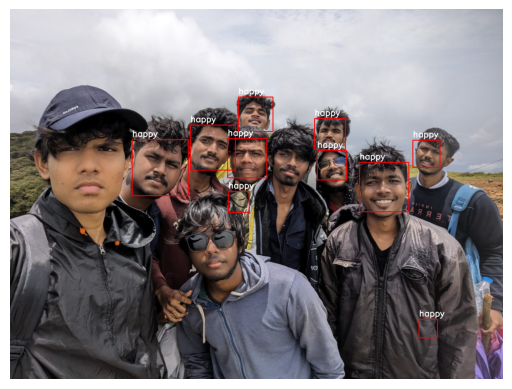

In [72]:
# Step 3: Enhanced Gesture Analysis (Facial Feature Extraction and Emotion Classification)
def classify_emotion(face_img):
    if face_img.size == 0:  # Check if the face image is empty
        return "unknown"
    
    gray_face = cv2.cvtColor(face_img, cv2.COLOR_RGB2GRAY)
    _, binary = cv2.threshold(gray_face, 70, 255, cv2.THRESH_BINARY)
    
    # Define regions for eyes and mouth
    height, width = binary.shape
    mouth_region = binary[int(0.85 * height):, :]
    eye_region = binary[:int(0.4 * height), :]

    #Step 4:Image Categorization (Overall Sentiment)
    contours, _ = cv2.findContours(mouth_region, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    emotions = "neutral"
    if contours:
        # Find the largest contour assuming it's the mouth
        largest_contour = max(contours, key=cv2.contourArea)
        _, _, w, h = cv2.boundingRect(largest_contour)
        
        # Criteria for happy or sad based on aspect ratio and position
        aspect_ratio = w / float(h)
        if aspect_ratio > 0.5:  # Wider mouth suggests smile
            emotions = "happy"
        else:
            emotions = "sad"
    else:
        emotions = "neutral"

    return emotions

# Load images and detect faces (assuming previous code steps for loading images and detecting faces)
image = images[12]  # Use a specific image for demonstration
faces = detect_faces(image)
individual_emotions = []

# Process each detected face
for (x, y, w, h) in faces:
    face = image[y:y+h, x:x+w]
    if face.size > 0:  # Ensure the face region is not empty
        emotion = classify_emotion(face)
        individual_emotions.append(emotion)
    else:
        individual_emotions.append("unknown")

# Step 5: Display Results
img_copy = image.copy()
print("Individual Emotions:", individual_emotions)
# Determine overall crowd sentiment based on majority
crowd_sentiment = max(set(individual_emotions), key=individual_emotions.count)
print("Overall Sentiment of Crowd:", crowd_sentiment)

# Annotate and display the image with individual emotions
for idx, (x, y, w, h) in enumerate(faces):
    cv2.putText(img_copy, individual_emotions[idx], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.90, (255, 255, 255), 2)
    cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Draw rectangle around each face

plt.imshow(img_copy)
plt.axis('off')
plt.show()


In [78]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import os
from matplotlib import pyplot as plt

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define dataset path
dataset_path = '/Users/madha/OneDrive/Desktop/fall sem 2024/image and video analytics/lab/lab 5/facial expressions/people'
image_paths = [os.path.join(dataset_path, filename) for filename in os.listdir(dataset_path)]

# Feature extraction functions
def extract_geometric_features(face_roi):
    height, width = face_roi.shape[:2]
    eye_distance = width * 0.4
    jawline_width = width
    face_height = height
    eye_to_jawline_ratio = eye_distance / jawline_width
    eye_to_face_height_ratio = eye_distance / face_height
    return eye_to_jawline_ratio, eye_to_face_height_ratio, jawline_width

def extract_lbp_features(image):
    radius = 3
    n_points = 8 * radius
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray_image, n_points, radius, method="uniform")
    hist, _ = np.histogram(lbp, bins=np.arange(0, n_points + 3), density=True)
    return hist

def identify_gender(geometric_features, lbp_features):
    eye_to_jawline_ratio, eye_to_face_height_ratio, jawline_width = geometric_features
    lbp_mean = np.mean(lbp_features)
    
    # Example rule-based logic
    if eye_to_jawline_ratio > 0.35 and eye_to_face_height_ratio > 0.3 and jawline_width < 150:
        return "Female"
    elif lbp_mean > 0.15:  # Indicate strong texture for male features
        return "Male"
    else:
        return "Male"

# Load and process each image
for image_path in image_paths:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not load image at path: {image_path}")
        continue
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        face_roi = image[y:y+h, x:x+w]
        geometric_features = extract_geometric_features(face_roi)
        lbp_features = extract_lbp_features(face_roi)
        gender = identify_gender(geometric_features, lbp_features)
        
        # Display results
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(image, gender, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Gender: {gender}")
        plt.axis("off")
        plt.show()
